# 3.3 Analiza napovedanih aktivnih struktur

In [1]:
%run __A_knjiznice.py

# Import specific elements from the script
from __A_knjiznice import *
from __B_funkcije import *
import __C_konstante as kon

## Molekule modela RF

In [2]:
best_molecules_rf = pd.read_csv(f'{kon.path_files}/podatki_napoved/most_active_filtered_rf_all.csv')
molecules_rf = best_molecules_rf[['Smiles', 'Predicted_Activity', 'Probability_Active']]
molecules_rf

,Smiles,Predicted_Activity,Probability_Active
0,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,1,0.970152
1,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,1,0.950978
2,NS(=O)(=O)NCCNc1nonc1C(Nc1ccc(F)c(Br)c1)=NO,1,0.950978
3,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,1,0.950978
4,NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,1,0.948135
...,...,...,...
2382,CC1(C)CC1(C(=O)Nc1ccc(CC(=O)NC2CC2)cc1)c1ccc(F...,1,0.693036
2383,Fc1ccc(cc1)N1CCCC2(CCN(CC2)C(=O)CCc2ccccc2)C1=O,1,0.693031
2384,CC(C)CC(=O)N1CCc2cc(CNC(=O)c3cccc(Cl)c3)ccc12,1,0.693000
2385,Cc1nccn1Cc1cccc(c1)C(=O)N1CCCC2(CN(C(=O)O2)c2c...,1,0.692996


In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors


# Define the function to calculate specific property
def calc_property(smiles, param):
    mol = Chem.MolFromSmiles(smiles)
    if mol:  # Check if molecule was successfully created
        if param == 'Molekulska_masa':
            return Descriptors.MolWt(mol)  # Molecular Weight
        elif param == 'logP':
            return Descriptors.MolLogP(mol)  # LogP
        elif param == 'Število_O_atomov':
            return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'O')  # Oxygen count
        elif param == 'Število_N_atomov':
            return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'N')  # Nitrogen count
        elif param == 'Akceptorji_H_vezi':
            return rdMolDescriptors.CalcNumHBA(mol)  # Hydrogen Bond Acceptors
        elif param == 'Donorji_H_vezi':
            return rdMolDescriptors.CalcNumHBD(mol)  # Hydrogen Bond Donors
        elif param == 'Število_aromatskih_obročev':
            return rdMolDescriptors.CalcNumAromaticRings(mol)  # Aromatic Rings
        elif param == 'TPSA':
            return rdMolDescriptors.CalcTPSA(mol)  # Topological Polar Surface Area
        elif param == 'Število_rotirajočih_vezi':
            return Descriptors.NumRotatableBonds(mol)  # Number of Rotatable 
        else:
            return None  # Return None for unsupported params
    else:
        return None  # Return None if the molecule is invalid

# Example: Assuming 'molecules' is your DataFrame with 'smiles' column
# molecules = pd.read_csv('your_file.csv')  # If you're loading the data


In [4]:
# List of properties to calculate and add to DataFrame
properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']

molecules_analysis_rf = molecules_rf.copy()

# Apply the function to each property and add the result as a new column
for prop in properties:
    molecules_analysis_rf[prop] = molecules_analysis_rf['Smiles'].apply(lambda x: calc_property(x, prop))

molecules_analysis_rf = molecules_analysis_rf.head(2000)

In [5]:
MW_stats = molecules_analysis_rf['Molekulska_masa'].describe()
logP_stats = molecules_analysis_rf['logP'].describe()
Aromatic_Rings_stats = molecules_analysis_rf['Število_aromatskih_obročev'].describe()
HBA_stats = molecules_analysis_rf['Akceptorji_H_vezi'].describe()
HBD_stats = molecules_analysis_rf['Donorji_H_vezi'].describe()
O_Count_stats = molecules_analysis_rf['Število_O_atomov'].describe()
N_Count_stats = molecules_analysis_rf['Število_N_atomov'].describe()

# Create a DataFrame to hold the statistics
stats_df_rf = pd.DataFrame({
    'Molekulska_masa': MW_stats,
    'logP': logP_stats,
    'Število_aromatskih_obročev': Aromatic_Rings_stats,
    'Akceptorji_H_vezi': HBA_stats,
    'Donorji_H_vezi': HBD_stats,
    'Število_O_atomov': O_Count_stats,
    'Število_N_atomov': N_Count_stats,
})

# Transpose the DataFrame to have the statistics as rows
stats_df_rf = stats_df_rf.transpose()
stats_df_rf

,count,mean,std,min,25%,50%,75%,max
Molekulska_masa,2000.0,402.748531,71.356659,215.2960,360.41175,396.4400,444.5555,725.6040
logP,2000.0,4.012718,1.087760,0.2333,3.25480,4.0227,4.7664,8.1717
Število_aromatskih_obročev,2000.0,2.071000,0.717786,1.0000,2.00000,2.0000,3.0000,5.0000
Akceptorji_H_vezi,2000.0,3.140500,1.263550,1.0000,2.00000,3.0000,4.0000,11.0000
Donorji_H_vezi,2000.0,1.066500,0.737122,0.0000,1.00000,1.0000,1.0000,5.0000
Število_O_atomov,2000.0,2.361500,0.972775,0.0000,2.00000,2.0000,3.0000,6.0000
Število_N_atomov,2000.0,2.571000,1.011173,1.0000,2.00000,2.0000,3.0000,8.0000


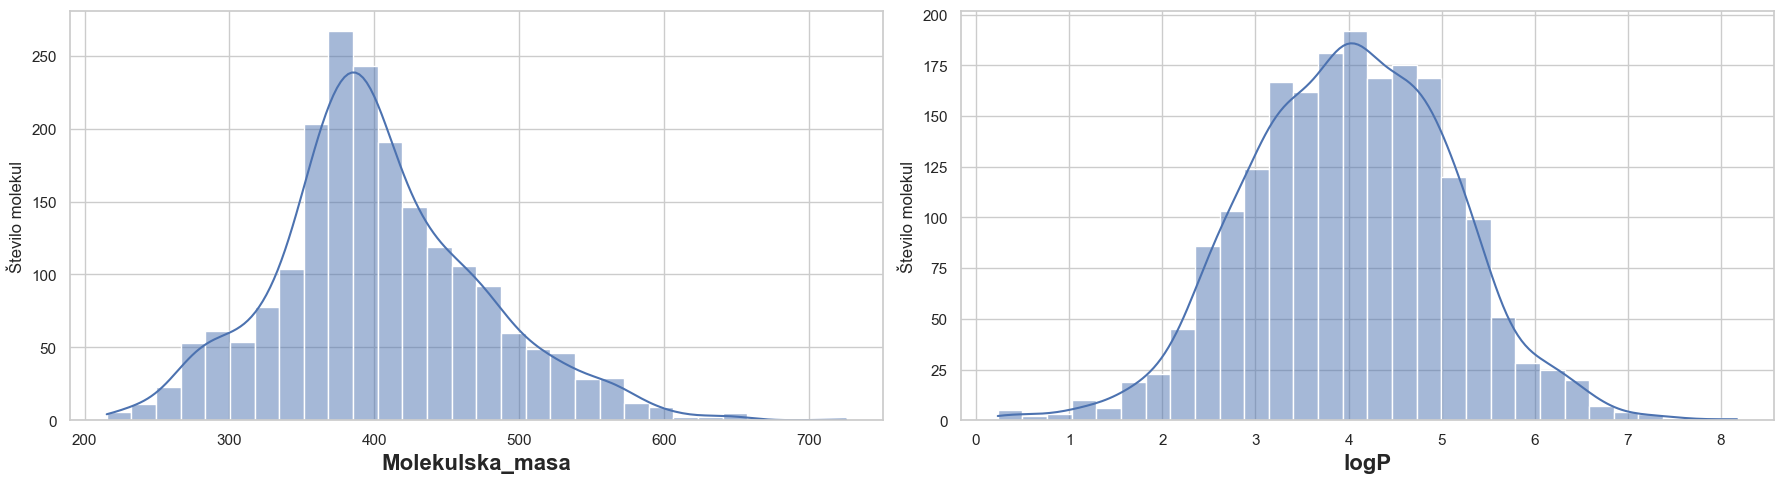

In [6]:
continuous_properties = ['Molekulska_masa', 'logP']

# properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']
# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for continuous properties
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_properties), figsize=(18, 5))

# Loop through each continuous property and create a histogram
for i, prop in enumerate(continuous_properties):
    sns.histplot(molecules_analysis_rf[prop].dropna(), bins=30, kde=True, ax=axes[i])
    # axes[i].set_title(f'{prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Adjust layout for continuous properties
plt.tight_layout()
plt.show()

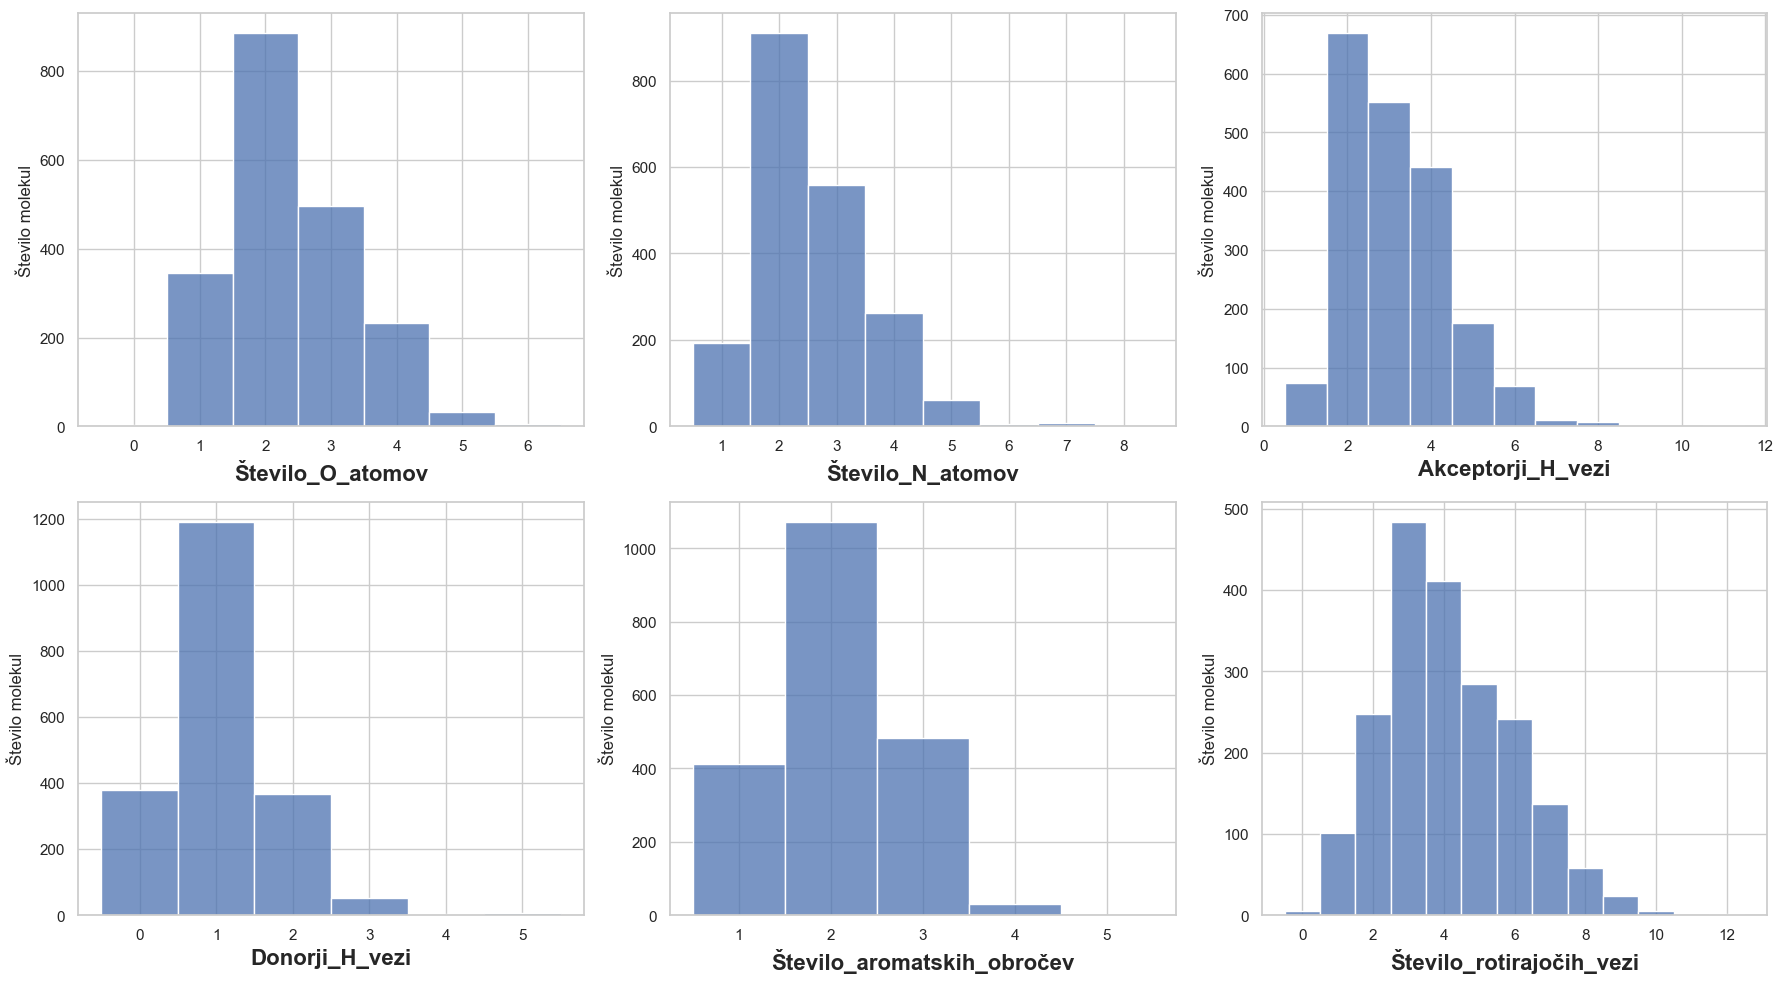

In [7]:
# Create a figure with subplots for discrete properties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each discrete property and create a histogram
for i, prop in enumerate(discrete_properties):
    sns.histplot(molecules_analysis_rf[prop].dropna(), bins=molecules_analysis_rf[prop].nunique(), discrete=True, ax=axes[i])
    # axes[i].set_title(f'Razporeditev {prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Remove any empty subplots if there are less than 6 properties
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for discrete properties
plt.tight_layout()
plt.show()

## Dokazane aktivne

In [8]:
molecules = pd.read_csv(f'{kon.path_files}/dp.csv')

for prop in properties:
    molecules[prop] = molecules['Smiles'].apply(lambda x: calc_property(x, prop))

In [9]:
active_molecules = molecules[molecules['Activity'] == 1]

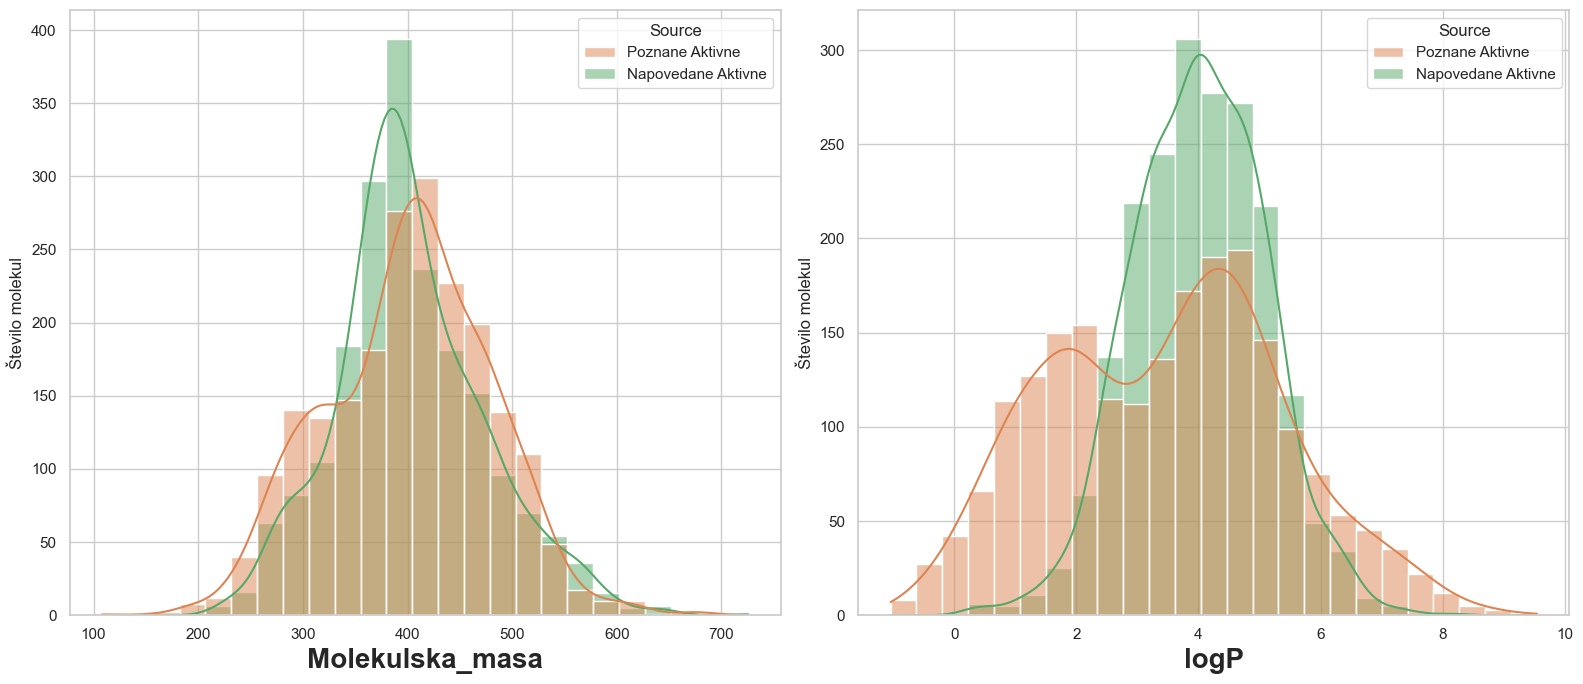

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure copies before modification to avoid SettingWithCopyWarning
active_molecules = active_molecules.copy()
molecules_analysis_rf = molecules_analysis_rf.copy()

# Assign source labels using .loc
active_molecules.loc[:, 'Source'] = 'Poznane Aktivne'  # Translated to Slovenian
molecules_analysis_rf.loc[:, 'Source'] = 'Napovedane Aktivne'  # Translated to Slovenian

# Combine both dataframes
combined_df = pd.concat([active_molecules, molecules_analysis_rf], ignore_index=True)

# List of continuous properties to visualize
continuous_properties = ['Molekulska_masa', 'logP']

# Set seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots for continuous properties
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_properties), figsize=(16, 7))

# Generate the default Seaborn color palette
palette = sns.color_palette()

# Define a custom color palette using the second and third colors from the Seaborn palette
custom_palette = {
    'Poznane Aktivne': palette[1],  # Second color (orange)
    'Napovedane Aktivne': palette[2]  # Third color (green)
}

# Loop through each continuous property and create a histogram
for i, prop in enumerate(continuous_properties):
    sns.histplot(data=combined_df, x=prop, hue='Source', bins=25, kde=True, ax=axes[i], palette=custom_palette)
    axes[i].set_xlabel(prop, fontsize=20, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Adjust layout for continuous properties
plt.tight_layout()
plt.show()

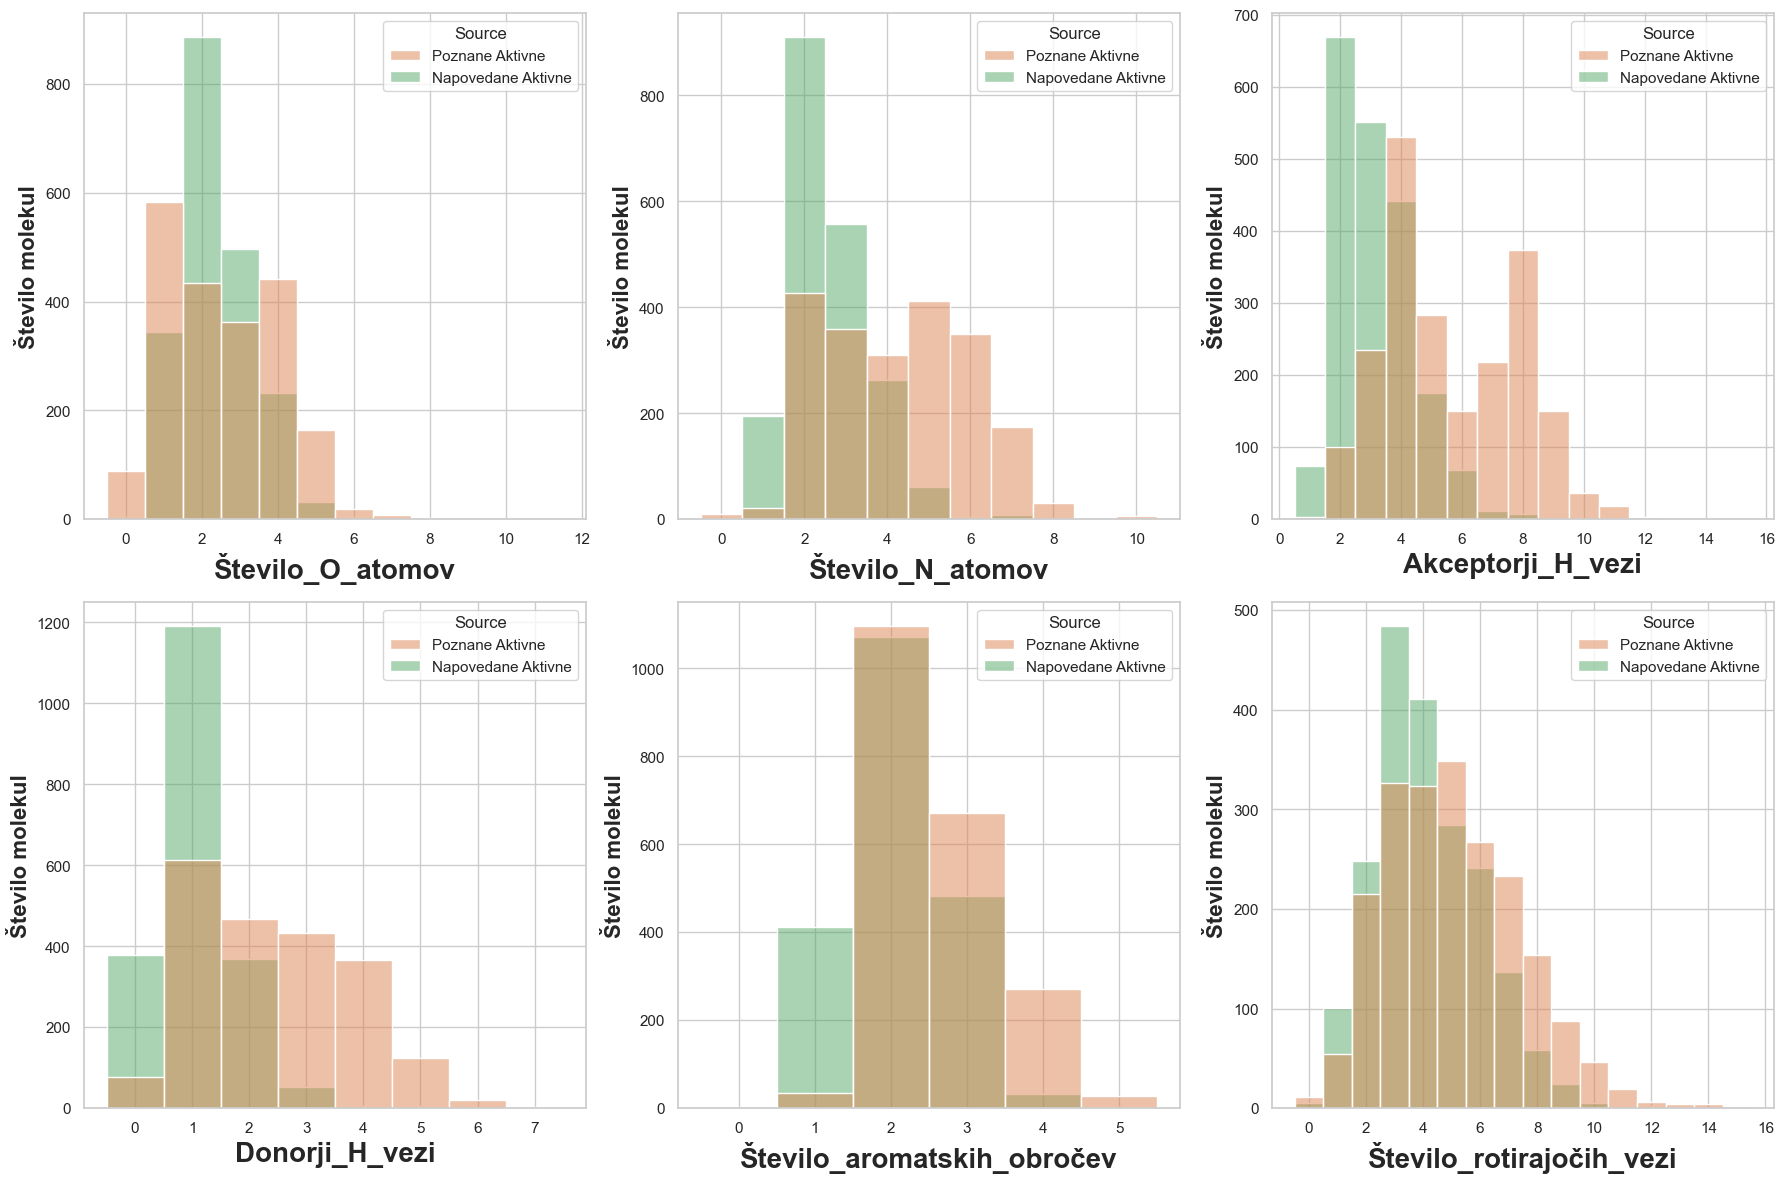

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming combined_df is already defined and contains the necessary data

# Generate the default Seaborn color palette
palette = sns.color_palette()

# Define a custom color palette using the second and third colors from the Seaborn palette
custom_palette = {
    'Poznane Aktivne': palette[1],  # Second color (orange)
    'Napovedane Aktivne': palette[2]  # Third color (green)
}

# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 
                       'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Create a figure with subplots for discrete properties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each discrete property and create a histogram
for i, prop in enumerate(discrete_properties):
    sns.histplot(data=combined_df, x=prop, hue='Source', palette=custom_palette, 
                 bins=combined_df[prop].nunique(), discrete=True, ax=axes[i])
    axes[i].set_xlabel(prop, fontsize=20, fontweight='bold')
    axes[i].set_ylabel('Število molekul', fontsize=16, fontweight='bold')
    # axes[i].set_title(f'Distribucija {prop}', fontsize=18, fontweight='bold')

# Remove any empty subplots if there are less than 6 properties
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for discrete properties
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
from rdkit import Chem
from collections import Counter

# Predefined list of exotic functional group SMARTS patterns
functional_groups_smarts = {
    # Common Groups
    'Aldehyde': '[CX3H1]=O',
    'Alcohol': '[OX2H]',
    'Carboxylic Acid': '[CX3](=O)[OX2H]',
    'Amine': '[NX3H2]',
    'Ketone': '[CX3]=O',
    'Ester': '[CX3](=O)[OX2]',
    
    # Specific Halogen Groups
    'Halogen': '[F,Cl,Br,I]',
    'Fluorine': '[F]',
    'Chlorine': '[Cl]',
    'Bromine': '[Br]',
    'Iodine': '[I]',
    'Geminal Dihalide': '[CX4]([F,Cl,Br,I])([F,Cl,Br,I])',
    'Vinyl Halide': '[CX3]=[CX3][F,Cl,Br,I]',
    'Aryl Halide': 'c[F,Cl,Br,I]',
    
    # Halogen Enrichment
    'More than 2 Halogens': '[CX4]([F,Cl,Br,I])([F,Cl,Br,I])([F,Cl,Br,I])',
    'More than 2 Fluorines': '[CX4]([F])([F])([F])',
    'More than 2 Chlorines': '[CX4]([Cl])([Cl])([Cl])',
    'More than 2 Bromines': '[CX4]([Br])([Br])([Br])',
    'More than 2 Iodines': '[CX4]([I])([I])([I])',
    
    # Nitrogen-Oxygen Exotic Groups
    'Nitroso': '[NX2]=O',
    'Nitro': '[NX3](=O)([OX1])',
    'Nitrate': '[NX3](=O)([OX1])[OX2H]',
    'Hydrazine': 'NN',
    'Hydroxylamine': 'NO',
    'Azide': 'N=[N+]=[N-]',
    
    # Exotic Rings and Heterocycles
    'Oxirane (Epoxide)': '[OX2]1[CX4][CX4]1',
    'Aziridine': '[NX3]1[CX4][CX4]1',
    'Thiazole': 'c1scn1',
    'Oxazole': 'c1ocn1',
    'Imidazole': 'c1ncnc1',
    'Triazole': 'c1nnnn1',
    'Tetrazole': 'c1nnnn1',
    'Isoxazole': 'c1ocn1',
    'Benzimidazole': 'c1ccc2nc[nH]c2c1',
    
    # Phosphorus and Sulfur Groups
    'Phosphate': '[PX4](=O)([OX1])[OX2H]',
    'Sulfonamide': '[SX4](=O)(=O)[NX3]',
    'Sulfone': '[SX4](=O)(=O)[CX4]',
    'Thiol': '[SX2H]',
    'Thioether': '[SX2][CX4]',
    
    # Exotic Bridges and Linkers
    'Diazo': '[NX2]=[CX2]=[NX2]',
    'Carbodiimide': '[NX2]=[CX2]=[NX2]',
    'Isocyanate': '[NX2]=[CX2]=O',
    'Urea': '[NX3][CX3](=O)[NX3]',
    'Guanidine': '[NX3][CX3]([NX3])[NX3]',
    'Isothiocyanate': '[NX2]=[CX2]=[SX1]',
    
    # Bicyclic Exotic Rings
    'Norbornane': 'C12CC1CCC2',
    'Spiro Compound': '[CX4]1[CX4][CX4]2[CX4][CX4]1[CX4]2',
}

# Function to identify functional groups in a molecule using SMARTS
def identify_functional_groups(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return []
    return [name for name, smarts in functional_groups_smarts.items() if mol.HasSubstructMatch(Chem.MolFromSmarts(smarts))]

# Filter data into Known Active and Predicted Active molecules
known_active_molecules = combined_df[combined_df['Source'] == 'Poznane Aktivne'].dropna(subset=['Smiles'])
predicted_active_molecules = combined_df[combined_df['Source'] == 'Napovedane Aktivne'].dropna(subset=['Smiles'])

# Identify functional groups in each category
known_active_counts = Counter()
predicted_active_counts = Counter()

for smiles in known_active_molecules['Smiles']:
    known_active_counts.update(set(identify_functional_groups(smiles)))

for smiles in predicted_active_molecules['Smiles']:
    predicted_active_counts.update(set(identify_functional_groups(smiles)))

# Convert to DataFrames
known_active_df = pd.DataFrame.from_dict(
    known_active_counts, orient='index', columns=['Known Active Count']
).sort_values(by='Known Active Count', ascending=False)

predicted_active_df = pd.DataFrame.from_dict(
    predicted_active_counts, orient='index', columns=['Predicted Active Count']
).sort_values(by='Predicted Active Count', ascending=False)

# Merge the results with proper column names
functional_group_comparison = pd.merge(
    known_active_df, 
    predicted_active_df, 
    left_index=True, 
    right_index=True, 
    how='outer'
).fillna(0)

# Compute percentage presence in each category
total_known_active = known_active_molecules['Smiles'].nunique()
total_predicted_active = predicted_active_molecules['Smiles'].nunique()

functional_group_comparison['% in Known Active'] = (
    functional_group_comparison['Known Active Count'] / total_known_active
) * 100

functional_group_comparison['% in Predicted Active'] = (
    functional_group_comparison['Predicted Active Count'] / total_predicted_active
) * 100

# Sort by highest presence in Known Actives
functional_group_comparison = functional_group_comparison.sort_values(by='Known Active Count', ascending=False)

# Display the final result
functional_group_comparison


,Known Active Count,Predicted Active Count,% in Known Active,% in Predicted Active
Halogen,1732,1865.0,82.358535,93.25
Aryl Halide,1645,1857.0,78.221588,92.85
Fluorine,1443,1631.0,68.616262,81.55
Alcohol,1174,132.0,55.825012,6.60
Ketone,1042,1952.0,49.548264,97.60
Hydroxylamine,834,67.0,39.657632,3.35
Bromine,575,82.0,27.341893,4.10
Chlorine,466,483.0,22.158821,24.15
Imidazole,463,18.0,22.016167,0.90
Amine,431,36.0,20.494532,1.80


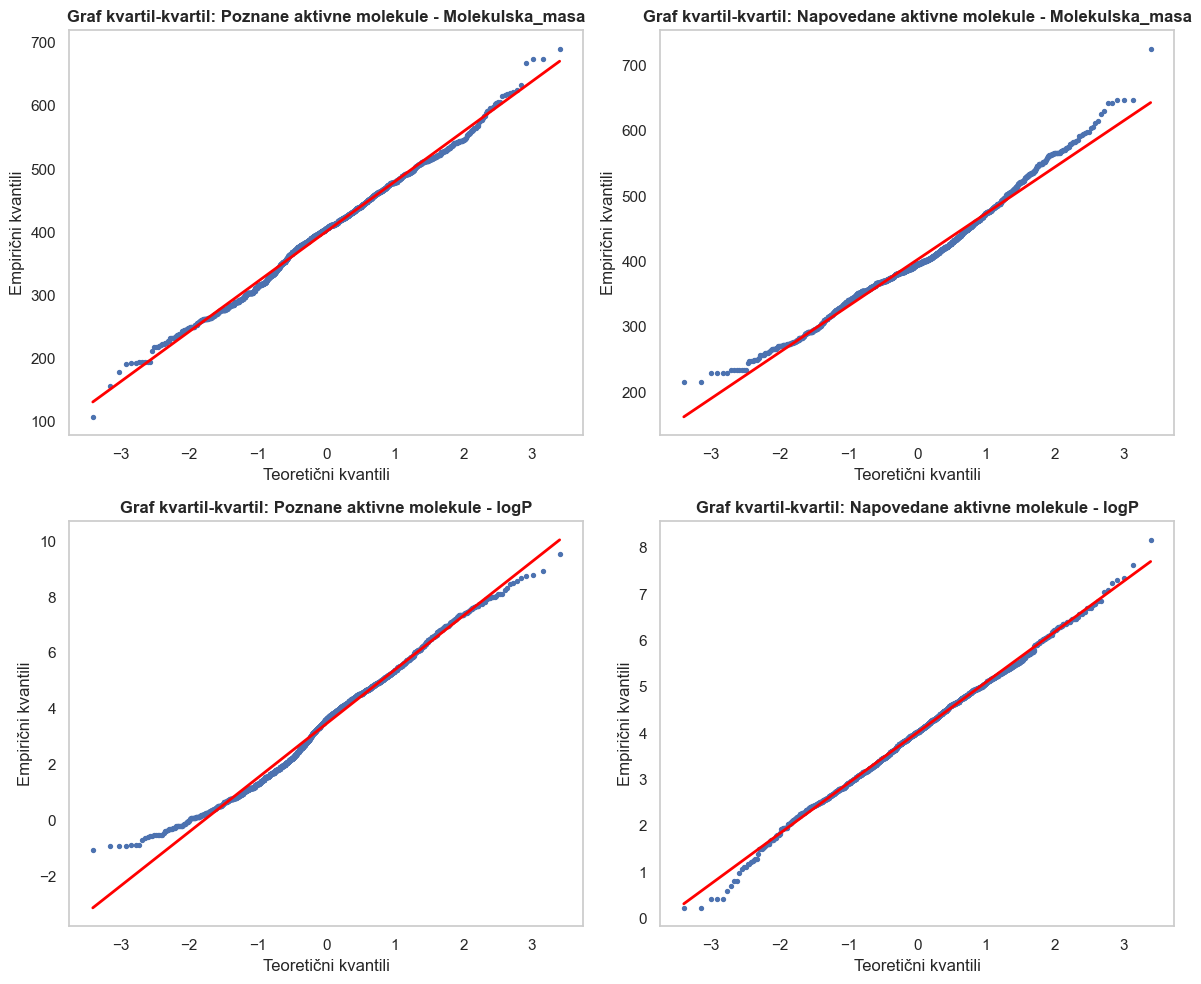

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Funkcija za risanje Q-Q plota
def qq_plot(ax, data, property_name, label):
    # Pridobite teoretične in empirične kvantile
    (osm, osr), (slope, intercept, r) = stats.probplot(data[property_name], dist="norm")
    
    # Narišite teoretične kvantile
    ax.scatter(osm, osr, s=8)  # s=10 nastavi velikost točk
    ax.plot(osm, slope * osm + intercept, color='red', lw=2)  # Narišite regresijsko črto
    ax.set_title(f'Graf kvartil-kvartil: {label} - {property_name}', fontweight='bold', fontsize=12)  # Bold and bigger title
    ax.set_xlabel('Teoretični kvantili')
    ax.set_ylabel('Empirični kvantili')
    ax.grid()

# Ustvarite mrežo 2x2 za Q-Q plote
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Prva lastnost: Molarna masa (MM)
property_name_mm = 'Molekulska_masa'  # Zamenjajte z dejanskim imenom stolpca
qq_plot(axs[0, 0], known_active_molecules, property_name_mm, 'Poznane aktivne molekule')
qq_plot(axs[0, 1], predicted_active_molecules, property_name_mm, 'Napovedane aktivne molekule')

# Druga lastnost: log P
property_name_logp = 'logP'  # Zamenjajte z dejanskim imenom stolpca
qq_plot(axs[1, 0], known_active_molecules, property_name_logp, 'Poznane aktivne molekule')
qq_plot(axs[1, 1], predicted_active_molecules, property_name_logp, 'Napovedane aktivne molekule')

plt.tight_layout()  # Prilagodi razmik med podgrafi
plt.show()

In [14]:
import pandas as pd
from scipy.stats import shapiro, ks_2samp, anderson

def check_normality(known_active_molecules, predicted_active_molecules, properties):
    # Initialize a single DataFrame to store all results
    results_df = pd.DataFrame(columns=[
        'Property', 'Test', 'Group', 'Statistic', 'p-value', 'Critical Values', 'Significance Level'
    ])

    for property_name in properties:
        rows = []  # Temporary storage for rows to add to DataFrame

        # Shapiro-Wilk Test
        shapiro_known_stat, shapiro_known_p = shapiro(known_active_molecules[property_name])
        shapiro_predicted_stat, shapiro_predicted_p = shapiro(predicted_active_molecules[property_name])

        rows.extend([
            {'Property': property_name, 'Test': 'Shapiro-Wilk', 'Group': 'Known Active', 
             'Statistic': shapiro_known_stat, 'p-value': shapiro_known_p},
            {'Property': property_name, 'Test': 'Shapiro-Wilk', 'Group': 'Predicted Active', 
             'Statistic': shapiro_predicted_stat, 'p-value': shapiro_predicted_p}
        ])

        # Kolmogorov-Smirnov Test
        ks_stat, ks_p = ks_2samp(known_active_molecules[property_name], predicted_active_molecules[property_name])
        rows.append({
            'Property': property_name, 'Test': 'Kolmogorov-Smirnov', 'Group': 'Both', 
            'Statistic': ks_stat, 'p-value': ks_p
        })

        # Anderson-Darling Test
        ad_result_known = anderson(known_active_molecules[property_name])
        ad_result_predicted = anderson(predicted_active_molecules[property_name])

        rows.extend([
            {'Property': property_name, 'Test': 'Anderson-Darling', 'Group': 'Known Active', 
             'Statistic': ad_result_known.statistic, 
             'Critical Values': ad_result_known.critical_values, 
             'Significance Level': ad_result_known.significance_level},
            {'Property': property_name, 'Test': 'Anderson-Darling', 'Group': 'Predicted Active', 
             'Statistic': ad_result_predicted.statistic, 
             'Critical Values': ad_result_predicted.critical_values, 
             'Significance Level': ad_result_predicted.significance_level}
        ])

        # Only concatenate if rows is not empty
        if rows:
            new_df = pd.DataFrame(rows)
            if not new_df.empty:  # Ensure new_df is not empty before concatenation
                results_df = pd.concat([results_df, new_df], ignore_index=True)

    return results_df

# Example properties
properties = ['logP', 'Molekulska_masa']
normality_results_df = check_normality(known_active_molecules, predicted_active_molecules, properties)

normality_results_df

,Property,Test,Group,Statistic,p-value,Critical Values,Significance Level
0,logP,Shapiro-Wilk,Known Active,0.989134,1.669352e-11,NaN,NaN
1,logP,Shapiro-Wilk,Predicted Active,0.998486,6.832970e-02,NaN,NaN
2,logP,Kolmogorov-Smirnov,Both,0.275358,6.524945e-69,NaN,NaN
3,logP,Anderson-Darling,Known Active,7.000004,NaN,"[0.575, 0.655, 0.786, 0.916, 1.09]","[15.0, 10.0, 5.0, 2.5, 1.0]"
4,logP,Anderson-Darling,Predicted Active,0.647293,NaN,"[0.575, 0.655, 0.785, 0.916, 1.09]","[15.0, 10.0, 5.0, 2.5, 1.0]"
5,Molekulska_masa,Shapiro-Wilk,Known Active,0.995390,4.386763e-06,NaN,NaN
6,Molekulska_masa,Shapiro-Wilk,Predicted Active,0.985324,1.838466e-13,NaN,NaN
7,Molekulska_masa,Kolmogorov-Smirnov,Both,0.083570,1.105286e-06,NaN,NaN
8,Molekulska_masa,Anderson-Darling,Known Active,3.705492,NaN,"[0.575, 0.655, 0.786, 0.916, 1.09]","[15.0, 10.0, 5.0, 2.5, 1.0]"
9,Molekulska_masa,Anderson-Darling,Predicted Active,10.171417,NaN,"[0.575, 0.655, 0.785, 0.916, 1.09]","[15.0, 10.0, 5.0, 2.5, 1.0]"


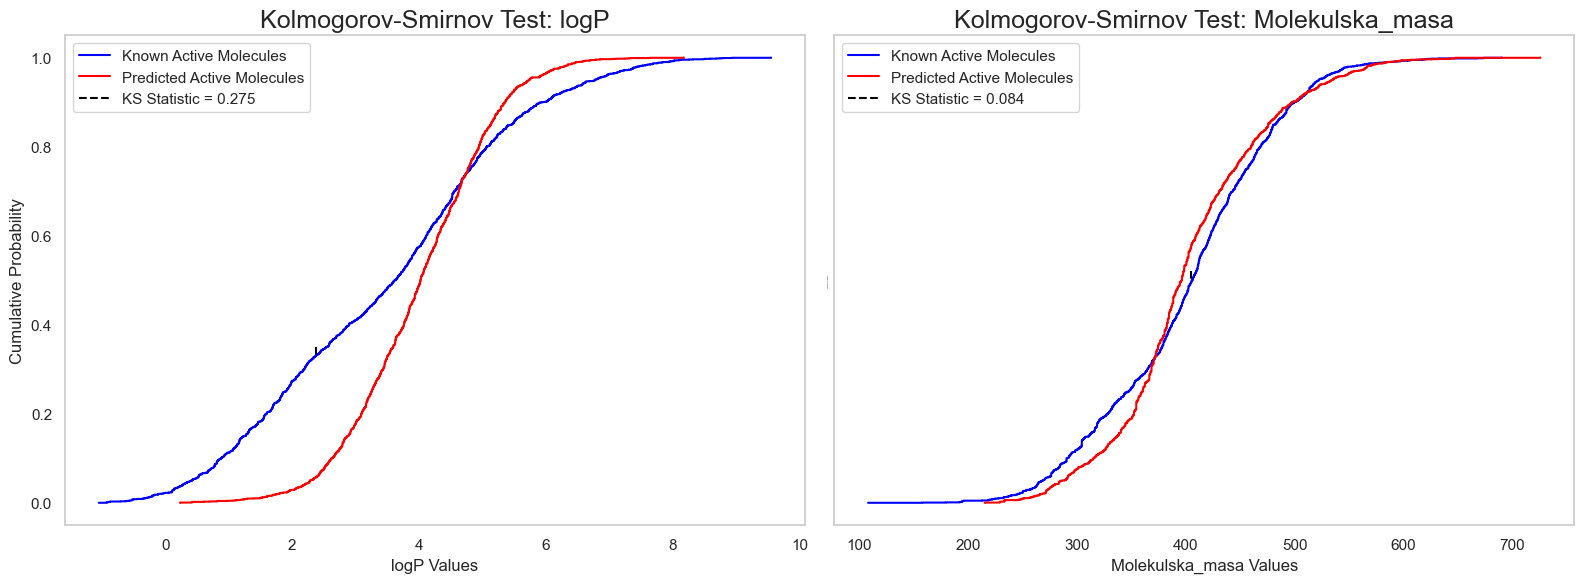

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp

# Define the properties to analyze
properties = ['logP', 'Molekulska_masa']

# Set up a figure for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for i, property_name in enumerate(properties):
    # Extract data for the property from known and predicted active molecules
    known_active_data = known_active_molecules[property_name]
    predicted_active_data = predicted_active_molecules[property_name]

    # Compute the empirical CDFs
    known_active_sorted = np.sort(known_active_data)
    predicted_active_sorted = np.sort(predicted_active_data)

    known_active_cdf = np.arange(1, len(known_active_sorted) + 1) / len(known_active_sorted)
    predicted_active_cdf = np.arange(1, len(predicted_active_sorted) + 1) / len(predicted_active_sorted)

    # Perform the KS test
    ks_stat, ks_p = ks_2samp(known_active_data, predicted_active_data)

    # Plot the empirical CDFs
    ax = axes[i]
    ax.step(known_active_sorted, known_active_cdf, label='Known Active Molecules', color='blue', where='post')
    ax.step(predicted_active_sorted, predicted_active_cdf, label='Predicted Active Molecules', color='red', where='post')

    # Highlight the KS statistic (maximum distance between CDFs)
    ks_distance_idx = np.argmax(np.abs(known_active_cdf - np.interp(known_active_sorted, predicted_active_sorted, predicted_active_cdf)))
    ax.vlines(known_active_sorted[ks_distance_idx], predicted_active_cdf[ks_distance_idx], known_active_cdf[ks_distance_idx], color='black', linestyle='--', label=f'KS Statistic = {ks_stat:.3f}')

    # Add labels, legend, and title
    ax.set_title(f'Kolmogorov-Smirnov Test: {property_name}', fontsize=18)
    ax.set_xlabel(f'{property_name} Values', fontsize=12)
    ax.set_ylabel('Cumulative Probability', fontsize=12 if i == 0 else 0)
    ax.legend()
    ax.grid()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [16]:
def print_normality_results(normality_results_df):
    for property_name in normality_results_df['Property'].unique():
        print(f"\n=== Distribution of {property_name} ===")
        property_df = normality_results_df[normality_results_df['Property'] == property_name]

        for test_name in property_df['Test'].unique():
            print(f"\n{test_name} Test:")
            test_df = property_df[property_df['Test'] == test_name]

            for _, row in test_df.iterrows():
                group = row['Group']
                stat = row['Statistic']
                p_value = row.get('p-value', None)  # Some tests may not have p-value
                critical_values = row.get('Critical Values', None)
                significance_levels = row.get('Significance Level', None)

                print(f"- For {group}:")
                if p_value is not None:
                    if p_value < 0.05:
                        print(f"  Non-normal distribution (p = {p_value:}, Statistic = {stat:})")
                    else:
                        print(f"  Likely normal distribution (p = {p_value:}, Statistic = {stat:})")
                else:
                    print(f"  Statistic = {stat:.4f}")
                    if critical_values is not None and significance_levels is not None:
                        print(f"  Critical Values = {critical_values}")
                        print(f"  Significance Levels = {significance_levels}")

# Print the detailed interpretation for each property and test
print_normality_results(normality_results_df)


=== Distribution of logP ===

Shapiro-Wilk Test:
- For Known Active:
  Non-normal distribution (p = 1.6693519333818415e-11, Statistic = 0.9891335908104236)
- For Predicted Active:
  Likely normal distribution (p = 0.06832970278433732, Statistic = 0.9984863630443165)

Kolmogorov-Smirnov Test:
- For Both:
  Non-normal distribution (p = 6.524944843227179e-69, Statistic = 0.2753578221588207)

Anderson-Darling Test:
- For Known Active:
  Likely normal distribution (p = nan, Statistic = 7.0000042415513235)
- For Predicted Active:
  Likely normal distribution (p = nan, Statistic = 0.647293383449778)

=== Distribution of Molekulska_masa ===

Shapiro-Wilk Test:
- For Known Active:
  Non-normal distribution (p = 4.386762984336306e-06, Statistic = 0.9953904897709771)
- For Predicted Active:
  Non-normal distribution (p = 1.83846638405244e-13, Statistic = 0.9853243960604197)

Kolmogorov-Smirnov Test:
- For Both:
  Non-normal distribution (p = 1.1052863896235356e-06, Statistic = 0.0835703756538278

## Neprekinjene spremenljivke - statistični testi

In [17]:
from scipy.stats import mannwhitneyu

def perform_mannwhitney(known_active_molecules, predicted_active_molecules, property_name):
    # Perform Mann-Whitney U Test
    stat, p_value = mannwhitneyu(known_active_molecules[property_name], predicted_active_molecules[property_name])

    # Compare the medians to determine direction
    median_known_active = known_active_molecules[property_name].median()
    median_predicted_active = predicted_active_molecules[property_name].median()

    # Determine direction
    if median_known_active > median_predicted_active:
        direction = "Known active molecules tend to have higher values"
    elif median_known_active < median_predicted_active:
        direction = "Predicted active molecules tend to have higher values"
    else:
        direction = "Medians are equal"

    # Interpretation
    result = {
        'Property': property_name,
        'Statistic': stat,
        'p-value': p_value,
        'Direction': direction,
        'Interpretation': 'Significant difference' if p_value < 0.05 else 'No significant difference'
    }

    return result

# Perform the Mann-Whitney U Test for 'logP'
property_name = 'logP'
result = perform_mannwhitney(known_active_molecules, predicted_active_molecules, property_name)

# Display the results
print(f"\n--- Mann-Whitney U Test Result for {result['Property']} ---")
print(f"Statistic: {result['Statistic']}")
print(f"P-value: {result['p-value']}")
print(f"Direction: {result['Direction']}")
print(f"Interpretation: {result['Interpretation']}")

# Perform the Mann-Whitney U Test for 'Molekulska_masa'
property_name2 = 'Molekulska_masa'
result2 = perform_mannwhitney(known_active_molecules, predicted_active_molecules, property_name2)

# Display the results
print(f"\n--- Mann-Whitney U Test Result for {result2['Property']} ---")
print(f"Statistic: {result2['Statistic']}")
print(f"P-value: {result2['p-value']}")
print(f"Direction: {result2['Direction']}")
print(f"Interpretation: {result2['Interpretation']}")


--- Mann-Whitney U Test Result for logP ---
Statistic: 1725135.5
P-value: 2.2139785860970303e-23
Direction: Predicted active molecules tend to have higher values
Interpretation: Significant difference

--- Mann-Whitney U Test Result for Molekulska_masa ---
Statistic: 2145869.0
P-value: 0.25835317869724883
Direction: Known active molecules tend to have higher values
Interpretation: No significant difference


In [18]:
# List of categorical properties
categorical_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 
                          'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Assuming you have DataFrames for predicted active and known active molecules
predicted_active_molecules = predicted_active_molecules.copy()
known_active_molecules = known_active_molecules.copy()

# Add the 'Activity' column
predicted_active_molecules['Activity'] = 'Predicted Active'
known_active_molecules['Activity'] = 'Known Active'

# Combine the data
combined_data = pd.concat([predicted_active_molecules[categorical_properties + ['Activity']],
                           known_active_molecules[categorical_properties + ['Activity']]])

# Create a list to store the results
results_list = []

for prop in categorical_properties:
    print(f"\nAnalyzing property: {prop}")
    
    # Ensure properties are treated as categorical for the analysis
    combined_data[prop] = combined_data[prop].astype(int)

    # Separate predicted active and known active groups for the current property
    predicted_active_values = combined_data.loc[combined_data['Activity'] == 'Predicted Active', prop]
    known_active_values = combined_data.loc[combined_data['Activity'] == 'Known Active', prop]
    
    # Debugging: Print the first few values for predicted and known active groups
    print(f"  Predicted Active values ({prop}): {predicted_active_values.head().to_list()}")
    print(f"  Known Active values ({prop}): {known_active_values.head().to_list()}")
    
    # Check if both groups have enough data for the test
    if len(predicted_active_values) < 2 or len(known_active_values) < 2:
        print(f"  Not enough data for Mann-Whitney U Test for {prop}. Skipping.")
        continue
    
    # Perform Mann-Whitney U Test
    u_stat, p_value = mannwhitneyu(predicted_active_values, known_active_values, alternative='two-sided')
    
    print(f"  Mann-Whitney U Test: U = {u_stat:.4f}, p = {p_value:.4e}")
    
    # Store the result
    results_list.append({
        'Property': prop,
        'Test': 'Mann-Whitney U',
        'U_stat': round(u_stat, 4),
        'p-value': f"{p_value:.4e}"
    })

# Convert the results list into a DataFrame
results_df = pd.DataFrame(results_list)

# Display the final DataFrame
print("\nFinal Results DataFrame:")
print(results_df)



Analyzing property: Število_O_atomov
  Predicted Active values (Število_O_atomov): [1, 4, 4, 4, 2]
  Known Active values (Število_O_atomov): [4, 2, 3, 1, 2]
  Mann-Whitney U Test: U = 2023190.5000, p = 3.0092e-02

Analyzing property: Število_N_atomov
  Predicted Active values (Število_N_atomov): [2, 7, 7, 7, 6]
  Known Active values (Število_N_atomov): [3, 2, 2, 4, 2]
  Mann-Whitney U Test: U = 947594.5000, p = 1.1472e-214

Analyzing property: Akceptorji_H_vezi
  Predicted Active values (Akceptorji_H_vezi): [2, 8, 8, 8, 7]
  Known Active values (Akceptorji_H_vezi): [6, 3, 3, 4, 2]
  Mann-Whitney U Test: U = 717573.0000, p = 6.1835e-301

Analyzing property: Donorji_H_vezi
  Predicted Active values (Donorji_H_vezi): [1, 5, 5, 5, 4]
  Known Active values (Donorji_H_vezi): [0, 1, 2, 1, 2]
  Mann-Whitney U Test: U = 906379.0000, p = 8.0602e-242

Analyzing property: Število_aromatskih_obročev
  Predicted Active values (Število_aromatskih_obročev): [3, 2, 2, 2, 2]
  Known Active values (Štev

# Molekule modela SVM

In [19]:
best_molecules_svm = pd.read_csv(f'{kon.path_files}/podatki_napoved/most_active_filtered_svm.csv')
molecules_svm = best_molecules_svm[['Smiles', 'Predicted_Activity', 'Probability_Active']]
molecules_svm

,Smiles,Predicted_Activity,Probability_Active
0,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,1,0.978715
1,CCn1cncc1C(=O)N1CCC(CC1)c1ccc(cn1)C(=O)Nc1ccc(...,1,0.976491
2,CC(C)C(=O)Nc1nc2cc(NS(=O)(=O)c3ccc(cc3)C3CCCCC...,1,0.974620
3,Cc1c(Br)ccc(F)c1C(=O)Nc1ccc(cc1)C1CCN(CC1)C(=O...,1,0.973860
4,CC(C)c1ccc(NC(=O)C2CCN(CC2)c2c(cnc3ccc(F)cc23)...,1,0.971987
...,...,...,...
2366,CC(C)CS(=O)(=O)N1CC2(CCN(CC(=O)Nc3ccc(C)c(F)c3...,1,0.892161
2367,CCOC(=O)N1CCc2c(C1)sc(NC(=O)c1ccc(cc1)S(=O)(=O...,1,0.892100
2368,Fc1ccc(NC(=O)O\N=c2\oc3cc4OC5(CCCCC5)CCc4cc3c3...,1,0.892090
2369,COc1cc(F)c(C(=O)N2CCC(CC2)c2ccc(NC(=O)c3ccc(cc...,1,0.892081


In [20]:
# List of properties to calculate and add to DataFrame
properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']

molecules_analysis_svm = molecules_svm.copy()

# Apply the function to each property and add the result as a new column
for prop in properties:
    molecules_analysis_svm[prop] = molecules_analysis_svm['Smiles'].apply(lambda x: calc_property(x, prop))

molecules_analysis_svm = molecules_analysis_svm.head(2000)

In [21]:
MW_stats = molecules_analysis_svm['Molekulska_masa'].describe()
logP_stats = molecules_analysis_svm['logP'].describe()
Aromatic_Rings_stats = molecules_analysis_svm['Število_aromatskih_obročev'].describe()
HBA_stats = molecules_analysis_svm['Akceptorji_H_vezi'].describe()
HBD_stats = molecules_analysis_svm['Donorji_H_vezi'].describe()
O_Count_stats = molecules_analysis_svm['Število_O_atomov'].describe()
N_Count_stats = molecules_analysis_svm['Število_N_atomov'].describe()

# Create a DataFrame to hold the statistics
stats_df_svm = pd.DataFrame({
    'Molekulska_masa': MW_stats,
    'logP': logP_stats,
    'Število_aromatskih_obročev': Aromatic_Rings_stats,
    'Akceptorji_H_vezi': HBA_stats,
    'Donorji_H_vezi': HBD_stats,
    'Število_O_atomov': O_Count_stats,
    'Število_N_atomov': N_Count_stats,
})

# Transpose the DataFrame to have the statistics as rows
stats_df_svm = stats_df_svm.transpose()
stats_df_svm

,count,mean,std,min,25%,50%,75%,max
Molekulska_masa,2000.0,439.788311,70.620305,264.3040,390.767000,433.53100,488.740000,1106.25900
logP,2000.0,4.161530,1.159628,0.2251,3.436725,4.19485,5.009625,8.49462
Število_aromatskih_obročev,2000.0,2.572500,0.740958,0.0000,2.000000,3.00000,3.000000,6.00000
Akceptorji_H_vezi,2000.0,4.420500,1.419397,1.0000,3.000000,4.00000,5.000000,14.00000
Donorji_H_vezi,2000.0,1.417500,0.663637,0.0000,1.000000,1.00000,2.000000,6.00000
Število_O_atomov,2000.0,2.737500,1.162011,0.0000,2.000000,3.00000,4.000000,11.00000
Število_N_atomov,2000.0,3.452500,1.235924,1.0000,2.000000,3.00000,4.000000,10.00000


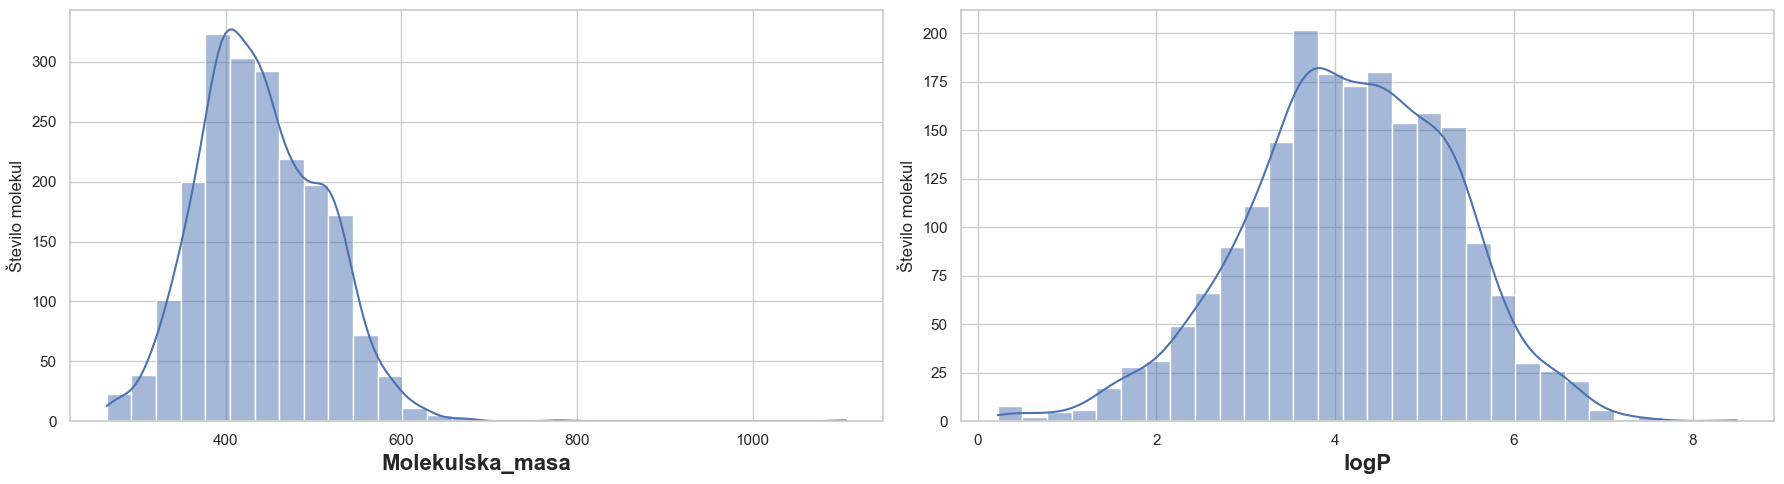

In [22]:
continuous_properties = ['Molekulska_masa', 'logP']

# properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']
# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for continuous properties
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_properties), figsize=(18, 5))

# Loop through each continuous property and create a histogram
for i, prop in enumerate(continuous_properties):
    sns.histplot(molecules_analysis_svm[prop].dropna(), bins=30, kde=True, ax=axes[i])
    # axes[i].set_title(f'{prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Adjust layout for continuous properties
plt.tight_layout()
plt.show()

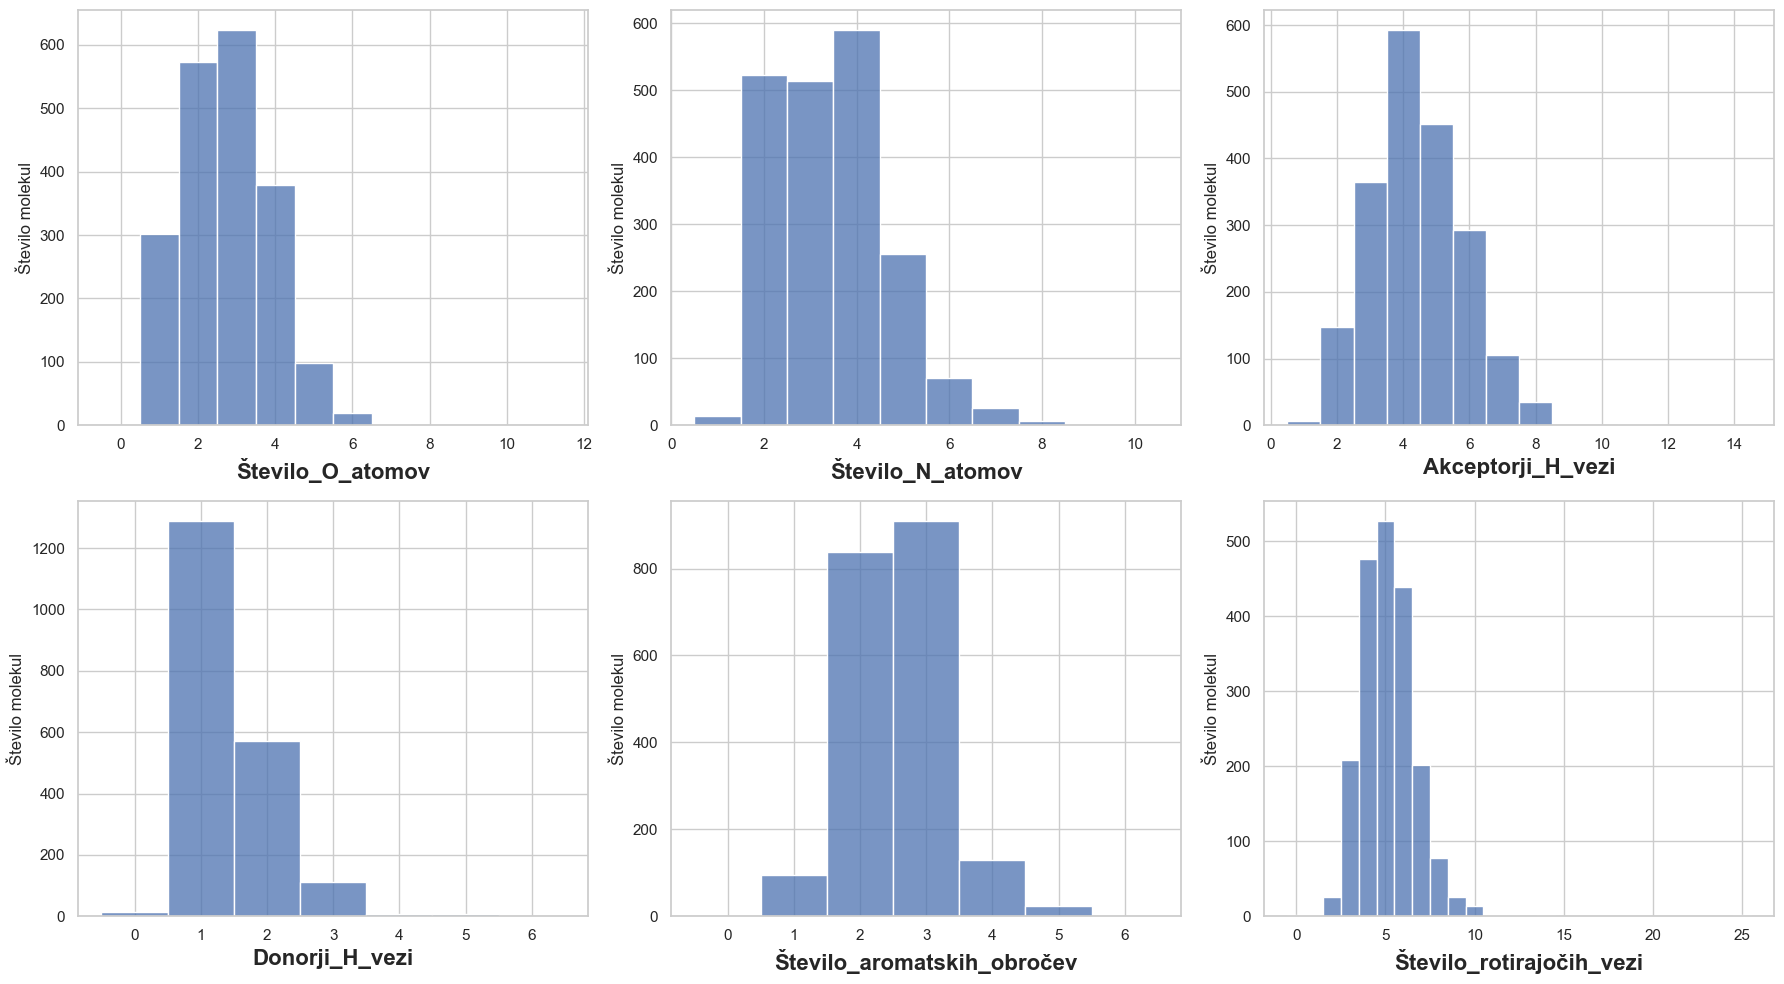

In [23]:
# Create a figure with subplots for discrete properties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each discrete property and create a histogram
for i, prop in enumerate(discrete_properties):
    sns.histplot(molecules_analysis_svm[prop].dropna(), bins=molecules_analysis_svm[prop].nunique(), discrete=True, ax=axes[i])
    # axes[i].set_title(f'Razporeditev {prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Remove any empty subplots if there are less than 6 properties
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for discrete properties
plt.tight_layout()
plt.show()

## Dokazane aktivne

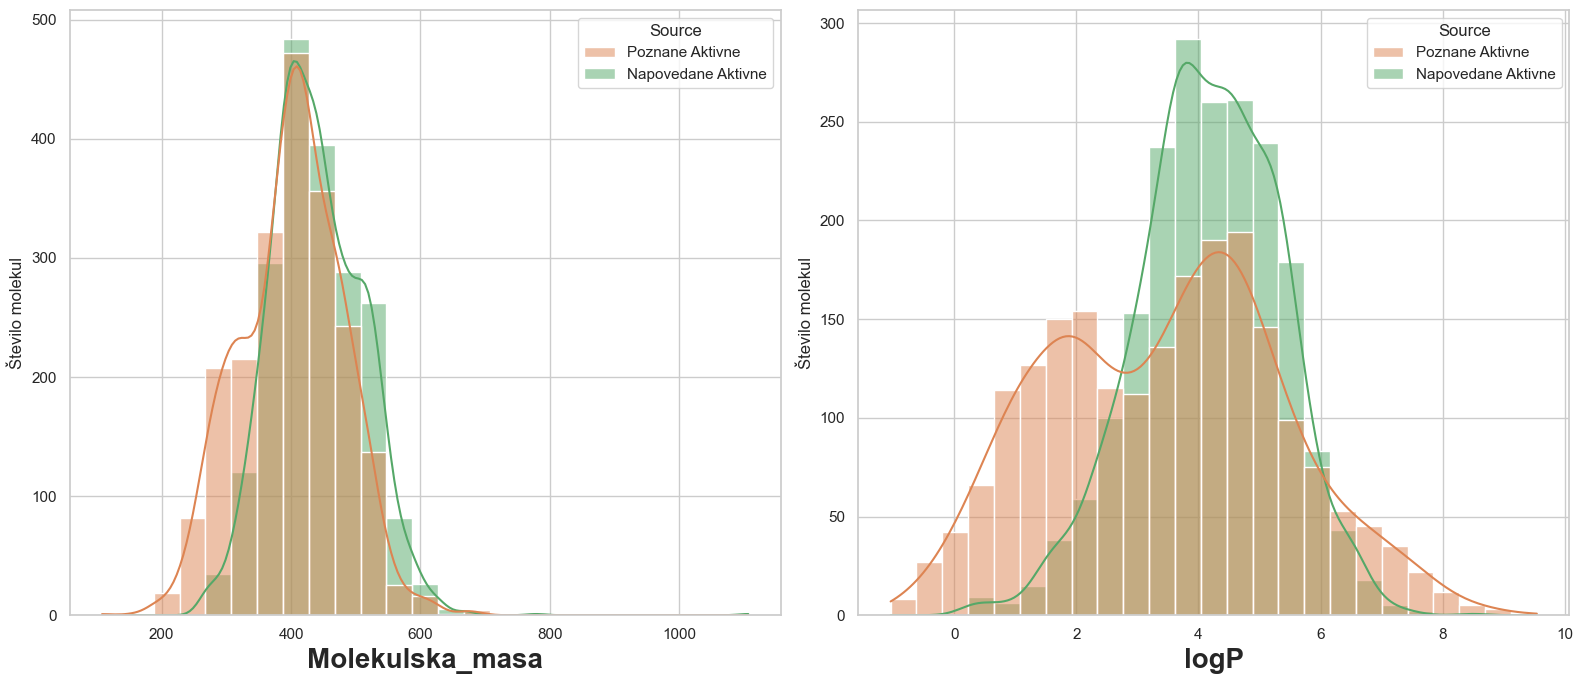

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure copies before modification to avoid SettingWithCopyWarning
active_molecules = active_molecules.copy()
molecules_analysis_rf = molecules_analysis_svm.copy()

# Assign source labels using .loc
active_molecules.loc[:, 'Source'] = 'Poznane Aktivne'  # Translated to Slovenian
molecules_analysis_rf.loc[:, 'Source'] = 'Napovedane Aktivne'  # Translated to Slovenian

# Combine both dataframes
combined_df = pd.concat([active_molecules, molecules_analysis_rf], ignore_index=True)

# List of continuous properties to visualize
continuous_properties = ['Molekulska_masa', 'logP']

# Set seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots for continuous properties
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_properties), figsize=(16, 7))

# Generate the default Seaborn color palette
palette = sns.color_palette()

# Define a custom color palette using the second and third colors from the Seaborn palette
custom_palette = {
    'Poznane Aktivne': palette[1],  # Second color (orange)
    'Napovedane Aktivne': palette[2]  # Third color (green)
}

# Loop through each continuous property and create a histogram
for i, prop in enumerate(continuous_properties):
    sns.histplot(data=combined_df, x=prop, hue='Source', bins=25, kde=True, ax=axes[i], palette=custom_palette)
    axes[i].set_xlabel(prop, fontsize=20, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Adjust layout for continuous properties
plt.tight_layout()
plt.show()

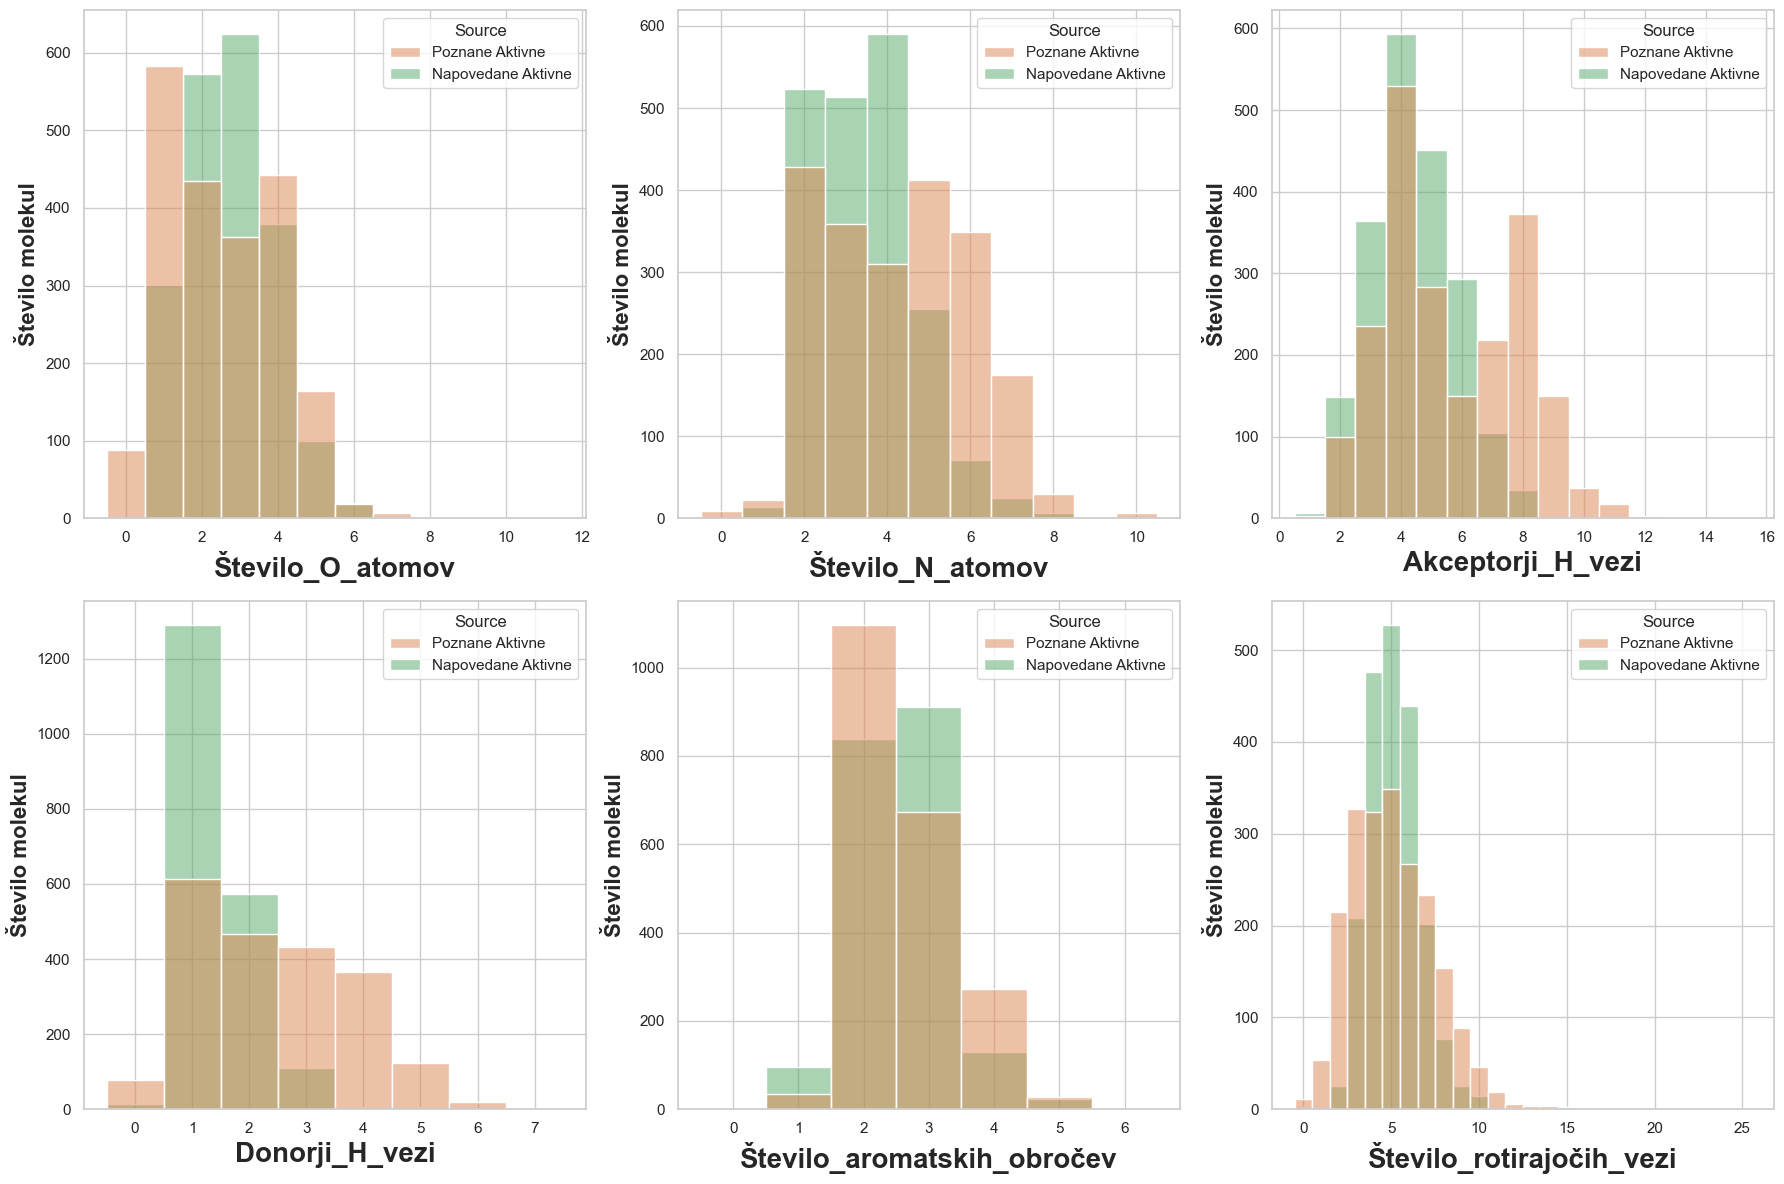

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming combined_df is already defined and contains the necessary data

# Generate the default Seaborn color palette
palette = sns.color_palette()

# Define a custom color palette using the second and third colors from the Seaborn palette
custom_palette = {
    'Poznane Aktivne': palette[1],  # Second color (orange)
    'Napovedane Aktivne': palette[2]  # Third color (green)
}

# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 
                       'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Create a figure with subplots for discrete properties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each discrete property and create a histogram
for i, prop in enumerate(discrete_properties):
    sns.histplot(data=combined_df, x=prop, hue='Source', palette=custom_palette, 
                 bins=combined_df[prop].nunique(), discrete=True, ax=axes[i])
    axes[i].set_xlabel(prop, fontsize=20, fontweight='bold')
    axes[i].set_ylabel('Število molekul', fontsize=16, fontweight='bold')
    # axes[i].set_title(f'Distribucija {prop}', fontsize=18, fontweight='bold')

# Remove any empty subplots if there are less than 6 properties
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for discrete properties
plt.tight_layout()
plt.show()

In [26]:
# Filter data into Known Active and Predicted Active molecules
known_active_molecules = combined_df[combined_df['Source'] == 'Poznane Aktivne'].dropna(subset=['Smiles'])
predicted_active_molecules = combined_df[combined_df['Source'] == 'Napovedane Aktivne'].dropna(subset=['Smiles'])

# Identify functional groups in each category
known_active_counts = Counter()
predicted_active_counts = Counter()

for smiles in known_active_molecules['Smiles']:
    known_active_counts.update(set(identify_functional_groups(smiles)))

for smiles in predicted_active_molecules['Smiles']:
    predicted_active_counts.update(set(identify_functional_groups(smiles)))

# Convert to DataFrames
known_active_df = pd.DataFrame.from_dict(
    known_active_counts, orient='index', columns=['Known Active Count']
).sort_values(by='Known Active Count', ascending=False)

predicted_active_df = pd.DataFrame.from_dict(
    predicted_active_counts, orient='index', columns=['Predicted Active Count']
).sort_values(by='Predicted Active Count', ascending=False)

# Merge the results with proper column names
functional_group_comparison = pd.merge(
    known_active_df, 
    predicted_active_df, 
    left_index=True, 
    right_index=True, 
    how='outer'
).fillna(0)

# Compute percentage presence in each category
total_known_active = known_active_molecules['Smiles'].nunique()
total_predicted_active = predicted_active_molecules['Smiles'].nunique()

functional_group_comparison['% in Known Active'] = (
    functional_group_comparison['Known Active Count'] / total_known_active
) * 100

functional_group_comparison['% in Predicted Active'] = (
    functional_group_comparison['Predicted Active Count'] / total_predicted_active
) * 100

# Sort by highest presence in Known Actives
functional_group_comparison = functional_group_comparison.sort_values(by='Known Active Count', ascending=False)

# Display the final result
functional_group_comparison

,Known Active Count,Predicted Active Count,% in Known Active,% in Predicted Active
Halogen,1732,1592.0,82.358535,79.60
Aryl Halide,1645,1540.0,78.221588,77.00
Fluorine,1443,1315.0,68.616262,65.75
Alcohol,1174,90.0,55.825012,4.50
Ketone,1042,1958.0,49.548264,97.90
Hydroxylamine,834,66.0,39.657632,3.30
Bromine,575,251.0,27.341893,12.55
Chlorine,466,349.0,22.158821,17.45
Imidazole,463,104.0,22.016167,5.20
Amine,431,78.0,20.494532,3.90


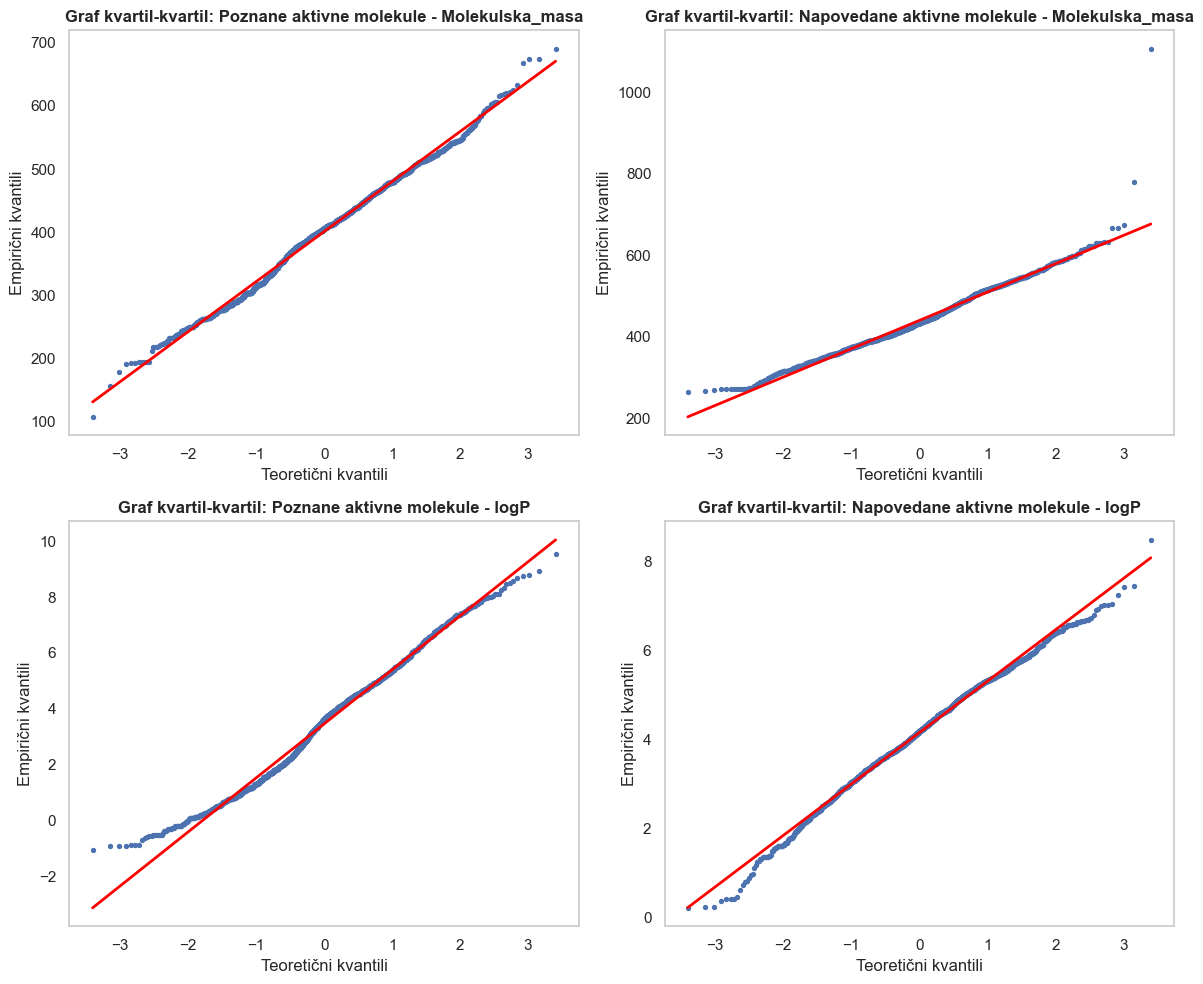

In [27]:
import matplotlib.pyplot as plt
import scipy.stats as stats


# Ustvarite mrežo 2x2 za Q-Q plote
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Prva lastnost: Molarna masa (MM)
property_name_mm = 'Molekulska_masa'  # Zamenjajte z dejanskim imenom stolpca
qq_plot(axs[0, 0], known_active_molecules, property_name_mm, 'Poznane aktivne molekule')
qq_plot(axs[0, 1], predicted_active_molecules, property_name_mm, 'Napovedane aktivne molekule')

# Druga lastnost: log P
property_name_logp = 'logP'  # Zamenjajte z dejanskim imenom stolpca
qq_plot(axs[1, 0], known_active_molecules, property_name_logp, 'Poznane aktivne molekule')
qq_plot(axs[1, 1], predicted_active_molecules, property_name_logp, 'Napovedane aktivne molekule')

plt.tight_layout()  # Prilagodi razmik med podgrafi
plt.show()

In [28]:
import pandas as pd
from scipy.stats import shapiro, ks_2samp, anderson

# Example properties
properties = ['logP', 'Molekulska_masa']
normality_results_df = check_normality(known_active_molecules, predicted_active_molecules, properties)

normality_results_df

,Property,Test,Group,Statistic,p-value,Critical Values,Significance Level
0,logP,Shapiro-Wilk,Known Active,0.989134,1.669352e-11,NaN,NaN
1,logP,Shapiro-Wilk,Predicted Active,0.995662,1.546630e-05,NaN,NaN
2,logP,Kolmogorov-Smirnov,Both,0.272650,1.486418e-67,NaN,NaN
3,logP,Anderson-Darling,Known Active,7.000004,NaN,"[0.575, 0.655, 0.786, 0.916, 1.09]","[15.0, 10.0, 5.0, 2.5, 1.0]"
4,logP,Anderson-Darling,Predicted Active,1.787820,NaN,"[0.575, 0.655, 0.785, 0.916, 1.09]","[15.0, 10.0, 5.0, 2.5, 1.0]"
5,Molekulska_masa,Shapiro-Wilk,Known Active,0.995390,4.386763e-06,NaN,NaN
6,Molekulska_masa,Shapiro-Wilk,Predicted Active,0.974200,1.628722e-18,NaN,NaN
7,Molekulska_masa,Kolmogorov-Smirnov,Both,0.183394,1.310881e-30,NaN,NaN
8,Molekulska_masa,Anderson-Darling,Known Active,3.705492,NaN,"[0.575, 0.655, 0.786, 0.916, 1.09]","[15.0, 10.0, 5.0, 2.5, 1.0]"
9,Molekulska_masa,Anderson-Darling,Predicted Active,5.407516,NaN,"[0.575, 0.655, 0.785, 0.916, 1.09]","[15.0, 10.0, 5.0, 2.5, 1.0]"


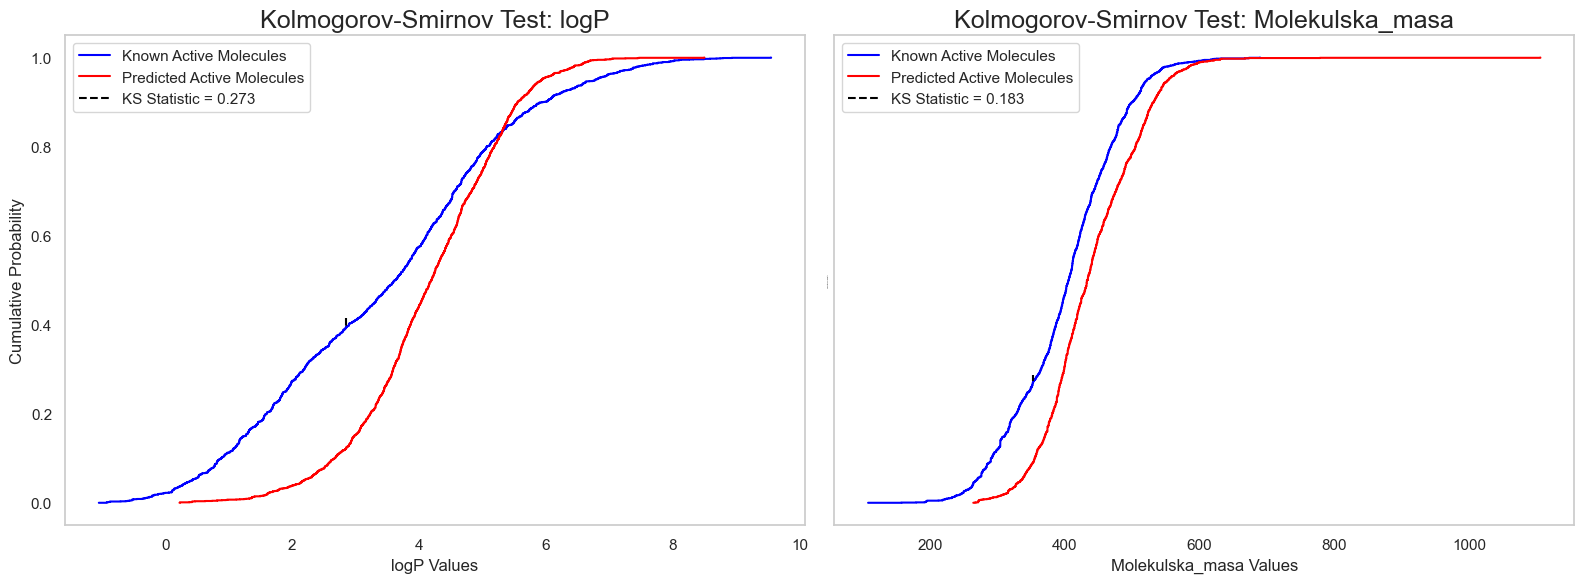

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp

# Define the properties to analyze
properties = ['logP', 'Molekulska_masa']

# Set up a figure for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for i, property_name in enumerate(properties):
    # Extract data for the property from known and predicted active molecules
    known_active_data = known_active_molecules[property_name]
    predicted_active_data = predicted_active_molecules[property_name]

    # Compute the empirical CDFs
    known_active_sorted = np.sort(known_active_data)
    predicted_active_sorted = np.sort(predicted_active_data)

    known_active_cdf = np.arange(1, len(known_active_sorted) + 1) / len(known_active_sorted)
    predicted_active_cdf = np.arange(1, len(predicted_active_sorted) + 1) / len(predicted_active_sorted)

    # Perform the KS test
    ks_stat, ks_p = ks_2samp(known_active_data, predicted_active_data)

    # Plot the empirical CDFs
    ax = axes[i]
    ax.step(known_active_sorted, known_active_cdf, label='Known Active Molecules', color='blue', where='post')
    ax.step(predicted_active_sorted, predicted_active_cdf, label='Predicted Active Molecules', color='red', where='post')

    # Highlight the KS statistic (maximum distance between CDFs)
    ks_distance_idx = np.argmax(np.abs(known_active_cdf - np.interp(known_active_sorted, predicted_active_sorted, predicted_active_cdf)))
    ax.vlines(known_active_sorted[ks_distance_idx], predicted_active_cdf[ks_distance_idx], known_active_cdf[ks_distance_idx], color='black', linestyle='--', label=f'KS Statistic = {ks_stat:.3f}')

    # Add labels, legend, and title
    ax.set_title(f'Kolmogorov-Smirnov Test: {property_name}', fontsize=18)
    ax.set_xlabel(f'{property_name} Values', fontsize=12)
    ax.set_ylabel('Cumulative Probability', fontsize=12 if i == 0 else 0)
    ax.legend()
    ax.grid()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [30]:
# Print the detailed interpretation for each property and test
print_normality_results(normality_results_df)


=== Distribution of logP ===

Shapiro-Wilk Test:
- For Known Active:
  Non-normal distribution (p = 1.6693519333818415e-11, Statistic = 0.9891335908104236)
- For Predicted Active:
  Non-normal distribution (p = 1.5466303619767444e-05, Statistic = 0.995662316291753)

Kolmogorov-Smirnov Test:
- For Both:
  Non-normal distribution (p = 1.4864177062743293e-67, Statistic = 0.2726497860199715)

Anderson-Darling Test:
- For Known Active:
  Likely normal distribution (p = nan, Statistic = 7.0000042415513235)
- For Predicted Active:
  Likely normal distribution (p = nan, Statistic = 1.7878197740869837)

=== Distribution of Molekulska_masa ===

Shapiro-Wilk Test:
- For Known Active:
  Non-normal distribution (p = 4.386762984336306e-06, Statistic = 0.9953904897709771)
- For Predicted Active:
  Non-normal distribution (p = 1.6287216091076778e-18, Statistic = 0.9741999478569139)

Kolmogorov-Smirnov Test:
- For Both:
  Non-normal distribution (p = 1.310881246055187e-30, Statistic = 0.18339443651925

In [31]:
from scipy.stats import mannwhitneyu


# Perform the Mann-Whitney U Test for 'logP'
property_name = 'logP'
result = perform_mannwhitney(known_active_molecules, predicted_active_molecules, property_name)

# Display the results
print(f"\n--- Mann-Whitney U Test Result for {result['Property']} ---")
print(f"Statistic: {result['Statistic']}")
print(f"P-value: {result['p-value']}")
print(f"Direction: {result['Direction']}")
print(f"Interpretation: {result['Interpretation']}")

# Perform the Mann-Whitney U Test for 'Molekulska_masa'
property_name2 = 'Molekulska_masa'
result2 = perform_mannwhitney(known_active_molecules, predicted_active_molecules, property_name2)

# Display the results
print(f"\n--- Mann-Whitney U Test Result for {result2['Property']} ---")
print(f"Statistic: {result2['Statistic']}")
print(f"P-value: {result2['p-value']}")
print(f"Direction: {result2['Direction']}")
print(f"Interpretation: {result2['Interpretation']}")


--- Mann-Whitney U Test Result for logP ---
Statistic: 1618216.5
P-value: 2.0661384685798004e-37
Direction: Predicted active molecules tend to have higher values
Interpretation: Significant difference

--- Mann-Whitney U Test Result for Molekulska_masa ---
Statistic: 1548334.5
P-value: 1.9580265535757578e-48
Direction: Predicted active molecules tend to have higher values
Interpretation: Significant difference


## MW test za diskretne vrednosti

In [32]:
import pandas as pd
from scipy.stats import mannwhitneyu

# List of categorical properties
categorical_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 
                          'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Assuming you have DataFrames for predicted active and known active molecules
predicted_active_molecules = predicted_active_molecules.copy()
known_active_molecules = known_active_molecules.copy()

# Add the 'Activity' column
predicted_active_molecules['Activity'] = 'Predicted Active'
known_active_molecules['Activity'] = 'Known Active'

# Combine the data
combined_data = pd.concat([predicted_active_molecules[categorical_properties + ['Activity']],
                           known_active_molecules[categorical_properties + ['Activity']]])

# Create a list to store the results
results_list = []

for prop in categorical_properties:
    print(f"\nAnalyzing property: {prop}")
    
    # Ensure properties are treated as categorical for the analysis
    combined_data[prop] = combined_data[prop].astype(int)

    # Separate predicted active and known active groups for the current property
    predicted_active_values = combined_data.loc[combined_data['Activity'] == 'Predicted Active', prop]
    known_active_values = combined_data.loc[combined_data['Activity'] == 'Known Active', prop]
    
    # Debugging: Print the first few values for predicted and known active groups
    print(f"  Predicted Active values ({prop}): {predicted_active_values.head().to_list()}")
    print(f"  Known Active values ({prop}): {known_active_values.head().to_list()}")
    
    # Check if both groups have enough data for the test
    if len(predicted_active_values) < 2 or len(known_active_values) < 2:
        print(f"  Not enough data for Mann-Whitney U Test for {prop}. Skipping.")
        continue
    
    # Perform Mann-Whitney U Test
    u_stat, p_value = mannwhitneyu(predicted_active_values, known_active_values, alternative='two-sided')
    
    print(f"  Mann-Whitney U Test: U = {u_stat:.4f}, p = {p_value:.4e}")
    
    # Store the result
    results_list.append({
        'Property': prop,
        'Test': 'Mann-Whitney U',
        'U_stat': round(u_stat, 4),
        'p-value': f"{p_value:.4e}"
    })

# Convert the results list into a DataFrame
results_df = pd.DataFrame(results_list)

# Display the final DataFrame
print("\nFinal Results DataFrame:")
print(results_df)



Analyzing property: Število_O_atomov
  Predicted Active values (Število_O_atomov): [1, 2, 3, 4, 1]
  Known Active values (Število_O_atomov): [4, 2, 3, 1, 2]
  Mann-Whitney U Test: U = 2312576.5000, p = 1.5093e-08

Analyzing property: Število_N_atomov
  Predicted Active values (Število_N_atomov): [2, 5, 3, 2, 4]
  Known Active values (Število_N_atomov): [3, 2, 2, 4, 2]
  Mann-Whitney U Test: U = 1558654.5000, p = 1.7012e-48

Analyzing property: Akceptorji_H_vezi
  Predicted Active values (Akceptorji_H_vezi): [2, 5, 5, 4, 4]
  Known Active values (Akceptorji_H_vezi): [6, 3, 3, 4, 2]
  Mann-Whitney U Test: U = 1476278.5000, p = 2.5114e-63

Analyzing property: Donorji_H_vezi
  Predicted Active values (Donorji_H_vezi): [1, 1, 2, 1, 1]
  Known Active values (Donorji_H_vezi): [0, 1, 2, 1, 2]
  Mann-Whitney U Test: U = 1207491.0000, p = 1.1697e-139

Analyzing property: Število_aromatskih_obročev
  Predicted Active values (Število_aromatskih_obročev): [3, 3, 3, 3, 3]
  Known Active values (Šte